In [1]:
import dagstermill

In [2]:
import pandas as pd
import sklearn.ensemble
import matplotlib.pyplot as plt

In [3]:
context = dagstermill.get_context()
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df[["sepal_length", "sepal_width"]]
y = df["petal_width"]

In [6]:
model = sklearn.ensemble.RandomForestRegressor()
fit = model.fit(X, y)
context.log.info("Fitted random forest model!")

2020-03-06 15:10:08 - dagster - INFO - system - 9fc24670-e1f4-4c34-a0a2-b3892610987b - Fitted random forest model!


In [7]:
score = fit.score(X, y)
context.log.info("Random forest model has score {}".format(score))

2020-03-06 15:10:09 - dagster - INFO - system - 9fc24670-e1f4-4c34-a0a2-b3892610987b - Random forest model has score 0.9445117490152564


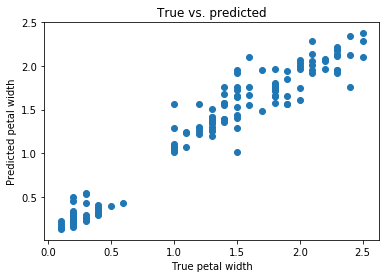

In [8]:
pred_y = fit.predict(X)
plt.scatter(y, pred_y)
plt.title("True vs. predicted")
plt.xlabel("True petal width")
plt.ylabel("Predicted petal width")
plt.show()